In [1]:
from astra.torch.utils import train_fn

import os
import torch
import torchvision
import torch.nn as nn
# import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset
import torchvision.models as models
import torchvision.transforms as transforms
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import random
#import umap
import math
from torchvision.utils import save_image
from torch.autograd import Variable
#from tqdm import tqdm

#from __future__ import print_function
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torchvision.utils as vutils

/home/project/anaconda3/envs/to113/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Specify the GPU device
os.environ["CUDA_VISIBLE_DEVICES"] = '2'

# Check if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"Using device: {device}")
print(f"Current CUDA device: {torch.cuda.current_device()}")
if device.type == 'cuda':
    print(f"Using GPU: {torch.cuda.get_device_name(device)}")
os.makedirs("images", exist_ok=True)

Using device: cuda
Current CUDA device: 0
Using GPU: Quadro RTX 5000


In [3]:
import torchvision.models as models

# Load the pre-trained model
model_path = "FractalDB-1000_res18.pth"
model = models.resnet18()  # Assuming the model is a ResNet-18
model.load_state_dict(torch.load(model_path))
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [4]:
tf = transforms.Compose([transforms.Resize(224),
                         transforms.ToTensor(),
                         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                        ])

train_set = torchvision.datasets.CIFAR10(root = './data', train = True, download = True,
                                     transform = tf)

print(len(train_set))
print(train_set[0][0].shape)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
50000
torch.Size([3, 224, 224])


In [5]:
from torch.utils.data import DataLoader
# Create a DataLoader for the training subset
trainloader = DataLoader(train_set, batch_size=256, shuffle=True, num_workers=2)

torch.Size([256, 3, 224, 224])


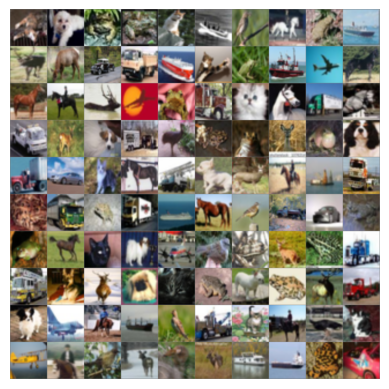

In [6]:
def showImage(images,epoch=-99, idx = -99):
    images = images.cpu().numpy()
    images = images/2 + 0.5
    plt.imshow(np.transpose(images,axes = (1,2,0)))
    plt.axis('off')
    if epoch!=-99:
        plt.savefig("e" + str(epoch) + "i" + str(idx) + ".png")

dataiter = iter(trainloader)
images,labels = next(dataiter)
print(images.size())
showImage(torchvision.utils.make_grid(images[0:100], nrow=10))

In [5]:
# Verify the first image to ensure the transformation worked
first_image, first_label = train_set[0]
print(first_image.shape)  # Should print torch.Size([3, 64, 64])

# Convert the entire dataset to a tensor format
X_tensor = torch.stack([train_set[i][0] for i in range(len(train_set))])
y_tensor = torch.tensor([train_set[i][1] for i in range(len(train_set))])

print(X_tensor.shape, X_tensor.dtype)  # Should print torch.Size([50000, 3, 64, 64]) torch.float32
print(y_tensor.shape, y_tensor.dtype)  # Should print torch.Size([50000]) torch.int64


torch.Size([3, 224, 224])
torch.Size([50000, 3, 224, 224]) torch.float32
torch.Size([50000]) torch.int64


In [5]:
import pickle
# Load the entire model
with open('model_2.pkl', 'rb') as f:
    model = pickle.load(f)

In [8]:
iter_losses, epoch_losses = train_fn(model, loss_fn= nn.CrossEntropyLoss(), input= X_tensor, output= y_tensor, lr=3e-4, epochs=15, batch_size=256)

Loss: 0.02392816: 100%|██████████| 15/15 [20:13<00:00, 80.88s/it]


In [9]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [7]:
iter_losses, epoch_losses = train_fn(model, loss_fn= nn.CrossEntropyLoss(), input= X_tensor, output= y_tensor, lr=3e-5, epochs=7, batch_size=256)

Loss: 0.00009420: 100%|██████████| 7/7 [09:19<00:00, 79.89s/it]


In [8]:
iter_losses, epoch_losses = train_fn(model, loss_fn= nn.CrossEntropyLoss(), input= X_tensor, output= y_tensor, lr=3e-6, epochs=8, batch_size=256)

Loss: 0.00000837: 100%|██████████| 8/8 [10:39<00:00, 79.89s/it]


In [13]:
import pickle
with open('model_2.pkl', 'wb') as f:
    pickle.dump(model, f)

In [6]:
tf = transforms.Compose([transforms.Resize(224),
                         transforms.ToTensor(),
                         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                        ])

validation_set = torchvision.datasets.CIFAR10(root = './data', train = False, download = True,
                                     transform = tf)

print(len(validation_set))
print(validation_set[0][0].shape)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
10000
torch.Size([3, 224, 224])


In [7]:
# Verify the first image to ensure the transformation worked
first_image, first_label = validation_set[0]
print(first_image.shape)  # Should print torch.Size([3, 64, 64])

X_val = torch.stack([validation_set[i][0] for i in range(len(validation_set))])
y_val = torch.tensor([validation_set[i][1] for i in range(len(validation_set))])

print(X_val.shape, X_val.dtype)  # Should print torch.Size([50000, 3, 64, 64]) torch.float32
print(y_val.shape, y_val.dtype)  # Should print torch.Size([50000]) torch.int64


torch.Size([3, 224, 224])
torch.Size([10000, 3, 224, 224]) torch.float32
torch.Size([10000]) torch.int64


In [11]:
def naive_accuracy(net,X,y):
    with torch.no_grad():
        logits_pred= net(X)
        y_pred= logits_pred.argmax(dim=1)
        acc= (y_pred==y).float().mean()
        return y_pred, acc

def predict(net, classes):
    for i in range(1):
        X_dataset= X_val[:1000].to(device)
        y_dataset= y_val[:1000].to(device)
        y_pred,acc= naive_accuracy(net, X_dataset, y_dataset)
        print(f'validation accuracy: {acc*100:.2f}%')

In [23]:
print(validation_set.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [15]:
torch.cuda.empty_cache()

In [9]:
predict(model, validation_set.classes)

validation accuracy: 90.80%


**Using Grayscale Images**

In [4]:
import torchvision.models as models

# Load the pre-trained model
model_path = "FractalDB-1000_res18.pth"
model_g = models.resnet18()  # Assuming the model is a ResNet-18
model_g.load_state_dict(torch.load(model_path))
model_g.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [5]:
# model weights have 3 channels but image has 1 channel
# make the model weights 1 channel
model_g.conv1.weight.shape
# torch.Size([64, 3, 7, 7])
model_g.conv1.weight= nn.Parameter(model_g.conv1.weight[:, 0:1, :, :])
model_g.conv1.weight.shape
# torch.Size([64, 1, 7, 7])

torch.Size([64, 1, 7, 7])

In [30]:
tf = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                         transforms.Resize(224),
                         transforms.ToTensor(),
                         transforms.Normalize((0.5), (0.5))
                        ])

train_set_g = torchvision.datasets.CIFAR10(root = './data', train = True, download = True,
                                     transform = tf)

print(len(train_set_g))
# print the shape of the first image
print(train_set_g[0][0].shape)  # Should print torch.Size([1, 64, 64])
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
50000
torch.Size([1, 224, 224])


In [6]:
# Verify the first image to ensure the transformation worked
first_image, first_label = train_set_g[0]
print(first_image.shape)  # Should print torch.Size([3, 64, 64])

# Convert the entire dataset to a tensor format
X_tensor_g = torch.stack([train_set_g[i][0] for i in range(len(train_set_g))])
y_tensor_g = torch.tensor([train_set_g[i][1] for i in range(len(train_set_g))])

print(X_tensor_g.shape, X_tensor_g.dtype)  # Should print torch.Size([50000, 3, 64, 64]) torch.float32
print(y_tensor_g.shape, y_tensor_g.dtype)  # Should print torch.Size([50000]) torch.int64


torch.Size([1, 224, 224])
torch.Size([50000, 1, 224, 224]) torch.float32
torch.Size([50000]) torch.int64


In [31]:
from torch.utils.data import DataLoader
# Create a DataLoader for the training subset
trainloader_g = DataLoader(train_set_g, batch_size=256, shuffle=True, num_workers=2)

torch.Size([256, 1, 224, 224])


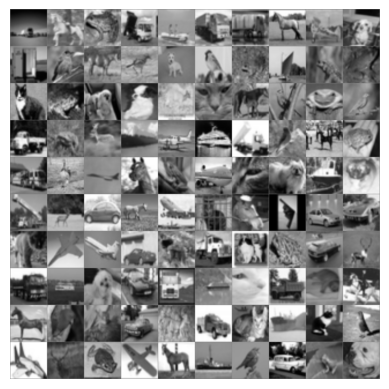

In [13]:
def showImage(images,epoch=-99, idx = -99):
    images = images.cpu().numpy()
    images = images/2 + 0.5
    plt.imshow(np.transpose(images,axes = (1,2,0)))
    plt.axis('off')
    if epoch!=-99:
        plt.savefig("e" + str(epoch) + "i" + str(idx) + ".png")

dataiter = iter(trainloader_g)
images,labels = next(dataiter)
print(images.size())
showImage(torchvision.utils.make_grid(images[0:100], nrow=10))

In [ ]:
# RuntimeError: Given groups=1, weight of size [64, 3, 7, 7], expected input[256, 1, 224, 224] to have 3 channels, but got 1 channels instead
# how to fix this error?    
model_path = "FractalDB-1000_res18.pth"
model_g = models.resnet18()
model_g.load_state_dict(torch.load(model_path))
model_g.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model_g.to(device)

# above code is not working, how to fix it

In [7]:
import pickle
# Load the entire model
with open('model_g.pkl', 'rb') as f:
    model_g = pickle.load(f)

In [7]:
iter_losses, epoch_losses = train_fn(model_g, loss_fn= nn.CrossEntropyLoss(), input= X_tensor_g, output= y_tensor_g, lr=3e-4, epochs=15, batch_size=64)

Loss: 0.03735794: 100%|██████████| 15/15 [19:26<00:00, 77.79s/it]


In [8]:
import pickle
with open('model_g_2.pkl', 'wb') as f:
    pickle.dump(model_g, f)

In [9]:
iter_losses, epoch_losses = train_fn(model_g, loss_fn= nn.CrossEntropyLoss(), input= X_tensor_g, output= y_tensor_g, lr=3e-5, epochs=7, batch_size=256)

Loss: 0.00040244: 100%|██████████| 7/7 [08:42<00:00, 74.68s/it]


In [10]:
iter_losses, epoch_losses = train_fn(model_g, loss_fn= nn.CrossEntropyLoss(), input= X_tensor_g, output= y_tensor_g, lr=3e-6, epochs=8, batch_size=256)

Loss: 0.00008428: 100%|██████████| 8/8 [09:58<00:00, 74.76s/it]


In [11]:
import pickle
with open('model_g.pkl', 'wb') as f:
    pickle.dump(model_g, f)

In [8]:
tf = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                         transforms.Resize(224),
                         transforms.ToTensor(),
                         transforms.Normalize((0.5), (0.5))
                        ])

validation_set_g = torchvision.datasets.CIFAR10(root = './data', train = False, download = True,
                                     transform = tf)

print(len(validation_set_g))
print(validation_set_g[0][0].shape)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
10000
torch.Size([1, 224, 224])


In [9]:
# Verify the first image to ensure the transformation worked
first_image, first_label = validation_set_g[0]
print(first_image.shape)  # Should print torch.Size([3, 64, 64])

# Convert the entire dataset to a tensor format
X_val_g = torch.stack([validation_set_g[i][0] for i in range(len(validation_set_g))])
y_val_g = torch.tensor([validation_set_g[i][1] for i in range(len(validation_set_g))])

print(X_val_g.shape, X_val_g.dtype)  # Should print torch.Size([50000, 3, 64, 64]) torch.float32
print(y_val_g.shape, y_val_g.dtype)  # Should print torch.Size([50000]) torch.int64


torch.Size([1, 224, 224])
torch.Size([10000, 1, 224, 224]) torch.float32
torch.Size([10000]) torch.int64


In [14]:
def naive_accuracy(net,X,y):
    with torch.no_grad():
        logits_pred= net(X)
        y_pred= logits_pred.argmax(dim=1)
        acc= (y_pred==y).float().mean()
        return y_pred, acc

def predict(net, classes):
    for i in range(1):
        X_dataset= X_val_g[:1000].to(device)
        y_dataset= y_val_g[:1000].to(device)
        y_pred,acc= naive_accuracy(net, X_dataset, y_dataset)
        print(f'validation accuracy: {acc*100:.2f}%')

In [15]:
predict(model_g, validation_set_g.classes)

validation accuracy: 88.50%


**Extracting lines of all the images**

In [23]:
! pip install opencv-python

In [3]:
import cv2

In [4]:
from torchvision.transforms import functional as F
# Define a custom transform for edge detection
class EdgeDetectionTransform:
    def __call__(self, img):
        # Convert the image to a numpy array
        img = np.array(img)
        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        # Apply Canny edge detection
        edges = cv2.Canny(gray, threshold1=100, threshold2=200)
        # Convert back to a PIL image
        edges = F.to_pil_image(edges)
        # Convert to 3 channels by duplicating the grayscale image
        edges = edges.convert("RGB")
        return edges

In [5]:
# Create a new dataset with the custom transform
# Define the transform pipeline
tf = transforms.Compose([
    EdgeDetectionTransform(),  # Apply edge detection
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
train_set_b = torchvision.datasets.CIFAR10(root = './data', train = True, download = True,
                                            transform = tf)

print(len(train_set_b))
# print the shape of the first image
print(train_set_b[0][0].shape)  # Should print torch.Size([1, 64, 64])
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
50000
torch.Size([3, 224, 224])


In [7]:
from torch.utils.data import DataLoader
# Create a DataLoader for the training subset
trainloader_b = DataLoader(train_set_b, batch_size=256, shuffle=True, num_workers=2)

torch.Size([256, 3, 224, 224])


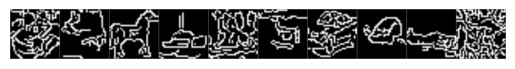

In [51]:
def showImage(images,epoch=-99, idx = -99):
    images = images.cpu().numpy()
    images = images/2 + 0.5
    plt.imshow(np.transpose(images,axes = (1,2,0)))
    plt.axis('off')
    if epoch!=-99:
        plt.savefig("e" + str(epoch) + "i" + str(idx) + ".png")

dataiter = iter(trainloader_b)
images,labels = next(dataiter)
print(images.size())
showImage(torchvision.utils.make_grid(images[0:10], nrow=10))

In [10]:
# Verify the first image to ensure the transformation worked
first_image, first_label = train_set_b[0]
print(first_image.shape)  # Should print torch.Size([3, 64, 64])

# Convert the entire dataset to a tensor format
X_tensor_b = torch.stack([train_set_b[i][0] for i in range(len(train_set_b))])
y_tensor_b = torch.tensor([train_set_b[i][1] for i in range(len(train_set_b))])

print(X_tensor_b.shape, X_tensor_b.dtype)  # Should print torch.Size([50000, 3, 64, 64]) torch.float32
print(y_tensor_b.shape, y_tensor_b.dtype)  # Should print torch.Size([50000]) torch.int64


torch.Size([3, 224, 224])
torch.Size([50000, 3, 224, 224]) torch.float32
torch.Size([50000]) torch.int64


In [6]:
import torchvision.models as models

# Load the pre-trained model
model_path = "FractalDB-1000_res18.pth"
model_b = models.resnet18()  # Assuming the model is a ResNet-18
model_b.load_state_dict(torch.load(model_path))
model_b.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [8]:
import pickle
# Load the entire model
with open('model_b_2.pkl', 'rb') as f:
    model_b = pickle.load(f)

In [10]:
iter_losses, epoch_losses = train_fn(model_b, loss_fn= nn.CrossEntropyLoss(), input= X_tensor_b, output= y_tensor_b, lr=3e-4, epochs=15, batch_size=64)

Loss: 0.05931602: 100%|██████████| 15/15 [20:48<00:00, 83.27s/it]


In [11]:
import pickle
with open('model_b_2.pkl', 'wb') as f:
    pickle.dump(model_b, f)

In [11]:
iter_losses, epoch_losses = train_fn(model_b, loss_fn= nn.CrossEntropyLoss(), input= X_tensor_b, output= y_tensor_b, lr=3e-5, epochs=7, batch_size=256)

Loss: 0.01438682: 100%|██████████| 7/7 [19:01<00:00, 163.14s/it]


In [14]:
iter_losses, epoch_losses = train_fn(model_b, loss_fn= nn.CrossEntropyLoss(), input= X_tensor_b, output= y_tensor_b, lr=3e-6, epochs=8, batch_size=256)

Loss: 0.00054241: 100%|██████████| 8/8 [10:40<00:00, 80.06s/it]


In [15]:
import pickle
with open('model_b.pkl', 'wb') as f:
    pickle.dump(model_b, f)

In [16]:
# Create a new dataset with the custom transform
# Define the transform pipeline
tf = transforms.Compose([
    EdgeDetectionTransform(),  # Apply edge detection
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
val_set_b = torchvision.datasets.CIFAR10(root = './data', train = False, download = True,
                                            transform = tf)

print(len(val_set_b))
# print the shape of the first image
print(val_set_b[0][0].shape)  # Should print torch.Size([1, 64, 64])
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
10000
torch.Size([3, 224, 224])


In [17]:
# Verify the first image to ensure the transformation worked
first_image, first_label = val_set_b[0]
print(first_image.shape)  # Should print torch.Size([3, 64, 64])

# Convert the entire dataset to a tensor format
X_val_b = torch.stack([val_set_b[i][0] for i in range(len(val_set_b))])
y_val_b = torch.tensor([val_set_b[i][1] for i in range(len(val_set_b))])

print(X_val_b.shape, X_val_b.dtype)  # Should print torch.Size([50000, 3, 64, 64]) torch.float32
print(y_val_b.shape, y_val_b.dtype)  # Should print torch.Size([50000]) torch.int64


torch.Size([3, 224, 224])
torch.Size([10000, 3, 224, 224]) torch.float32
torch.Size([10000]) torch.int64


In [18]:
def naive_accuracy(net,X,y):
    with torch.no_grad():
        logits_pred= net(X)
        y_pred= logits_pred.argmax(dim=1)
        acc= (y_pred==y).float().mean()
        return y_pred, acc

def predict(net, classes):
    for i in range(1):
        X_dataset= X_val_b[:1000].to(device)
        y_dataset= y_val_b[:1000].to(device)
        y_pred,acc= naive_accuracy(net, X_dataset, y_dataset)
        print(f'validation accuracy: {acc*100:.2f}%')

In [20]:
predict(model_b, val_set_b.classes)

validation accuracy: 68.00%
